# Credit Card Approval Prediction

## Load the data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

100%|██████████| 5.32M/5.32M [00:00<00:00, 7.58MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [3]:
import os

# List all files in the downloaded dataset
files = os.listdir(path)
print("Available files:", files)

Available files: ['credit_record.csv', 'application_record.csv']


In [4]:
df_application = pd.read_csv(f"{path}/application_record.csv")
df_record = pd.read_csv(f"{path}/credit_record.csv")

In [5]:
df_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Data Cleaning

In [7]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
df_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


merge the data base on the id

In [9]:
df = pd.merge(df_application, df_record, on='ID', how='inner')

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [13]:
df.isnull().sum()/df.shape[0]*100

,0
ID,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000


In [14]:
df["OCCUPATION_TYPE"].value_counts()

,count
OCCUPATION_TYPE,
Laborers,131572
Core staff,77112
Sales staff,70362
Managers,67738
Drivers,47678
High skill tech staff,31768
Accountants,27223
Medicine staff,26691
Cooking staff,13416


In [15]:
df["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [16]:
df.dropna(inplace=True)
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
ID,537667.000000,5079231.308957,42001.999788,5008806.000000,5044925.000000,5079091.000000,5115755.000000,5150487.000000
CNT_CHILDREN,537667.000000,0.506697,0.787285,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,537667.000000,197117.126677,104138.963465,27000.000000,135000.000000,180000.000000,229500.000000,1575000.000000
DAYS_BIRTH,537667.000000,-15010.958999,3416.418092,-24611.000000,-17594.000000,-14785.000000,-12239.000000,-7489.000000
DAYS_EMPLOYED,537667.000000,-2762.029935,2393.919456,-15713.000000,-3661.000000,-2147.000000,-1050.000000,-17.000000
FLAG_MOBIL,537667.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FLAG_WORK_PHONE,537667.000000,0.281615,0.449787,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_PHONE,537667.000000,0.298893,0.457773,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_EMAIL,537667.000000,0.100730,0.300971,0.000000,0.000000,0.000000,0.000000,1.000000
CNT_FAM_MEMBERS,537667.000000,2.303069,0.936852,1.000000,2.000000,2.000000,3.000000,20.000000


## Explore Data Analysis

### correlation matrix

<Axes: >

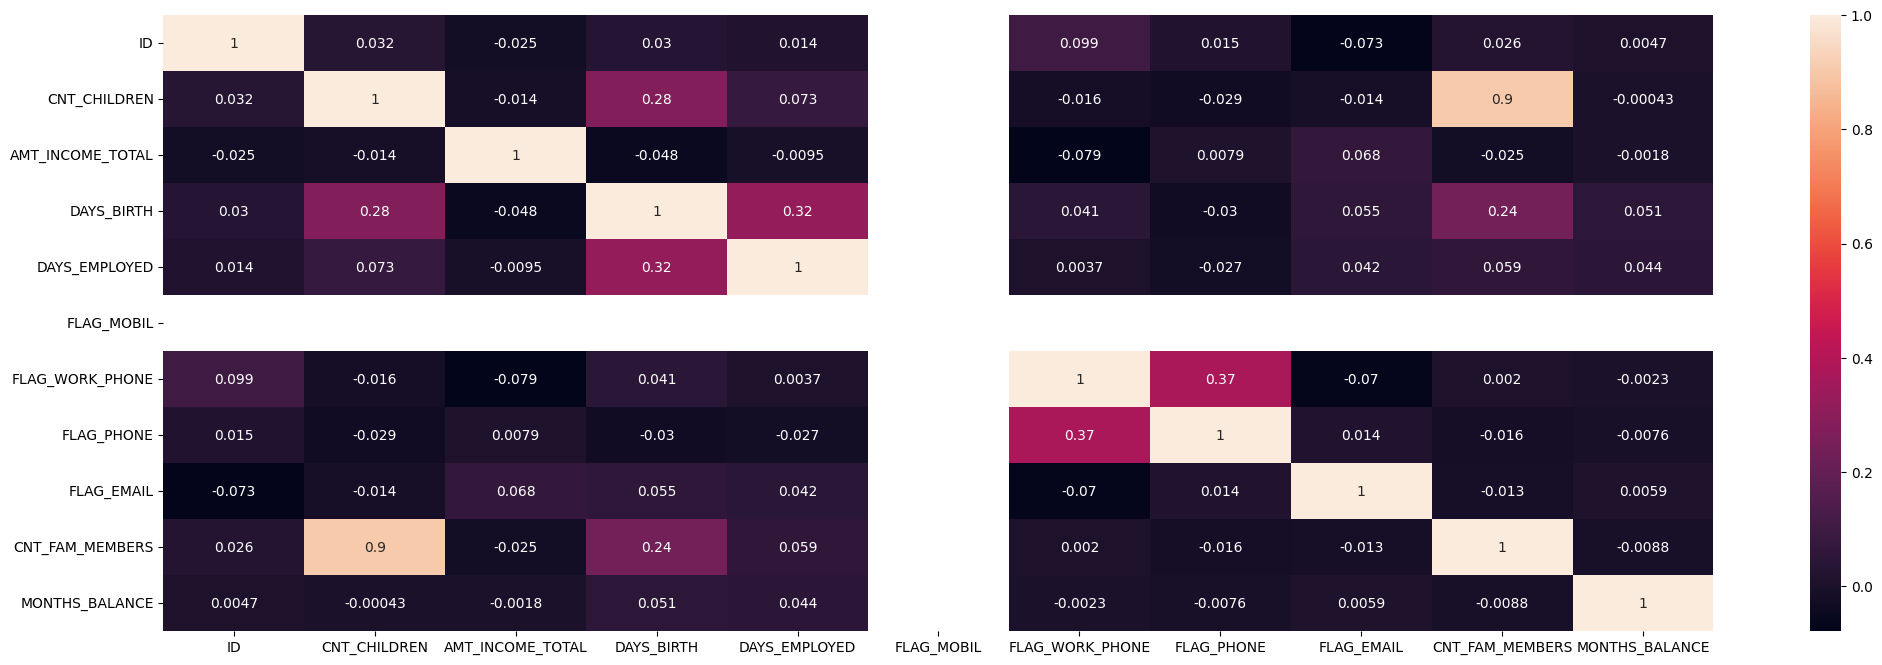

In [17]:
plt.figure(figsize=(25,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

### Categorical Data

In [18]:
Categorical=df.select_dtypes(include='object').columns.tolist()
Categorical

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'STATUS']

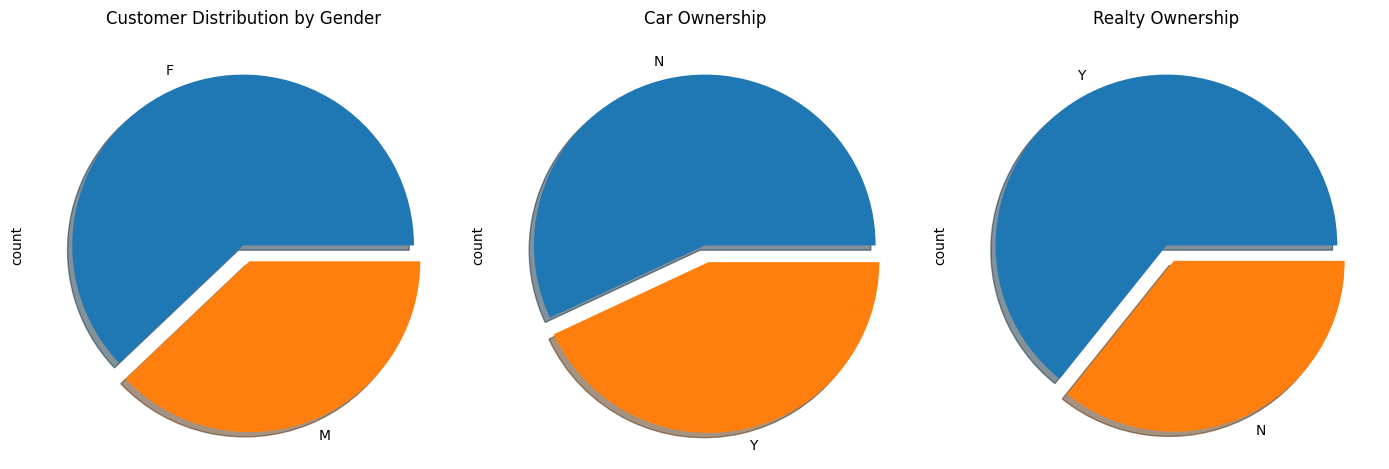

In [19]:
fig, axes = plt.subplots(1,3)

g1= df['CODE_GENDER'].value_counts().plot.pie(explode=[0,0.1], ax=axes[0],  shadow=True)
g1.set_title("Customer Distribution by Gender")

g2= df['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0,0.1], ax=axes[1],    shadow=True)
g2.set_title("Car Ownership")

g3= df['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0,0.1], ax=axes[2],  shadow=True)
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

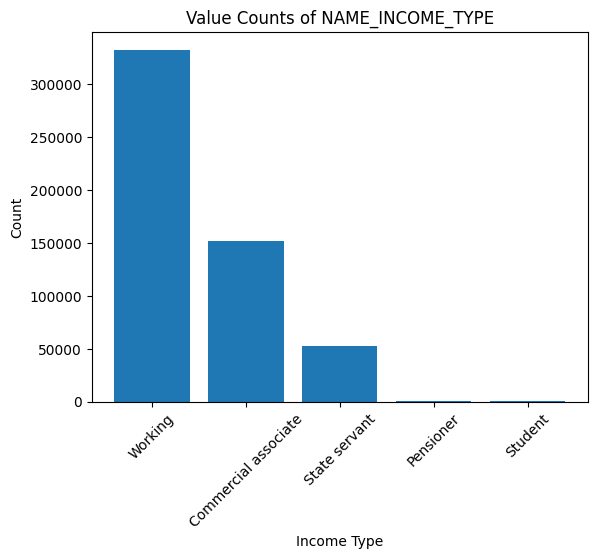

In [20]:
plt.bar(df["NAME_INCOME_TYPE"].value_counts().index, df["NAME_INCOME_TYPE"].value_counts().values)

plt.xlabel("Income Type")
plt.ylabel("Count")
plt.title("Value Counts of NAME_INCOME_TYPE")

plt.xticks(rotation=45)

plt.show()

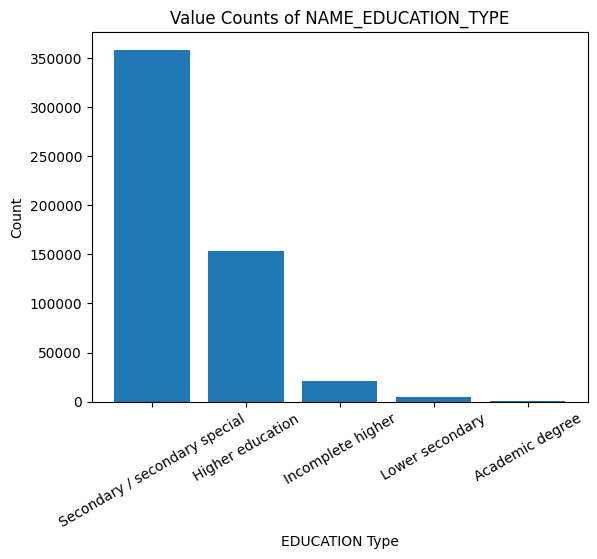

In [21]:
plt.bar(df["NAME_EDUCATION_TYPE"].value_counts().index, df["NAME_EDUCATION_TYPE"].value_counts().values)

plt.xlabel("EDUCATION Type")
plt.ylabel("Count")
plt.title("Value Counts of NAME_EDUCATION_TYPE")

plt.xticks(rotation=30)

plt.show()

<Axes: ylabel='OCCUPATION_TYPE'>

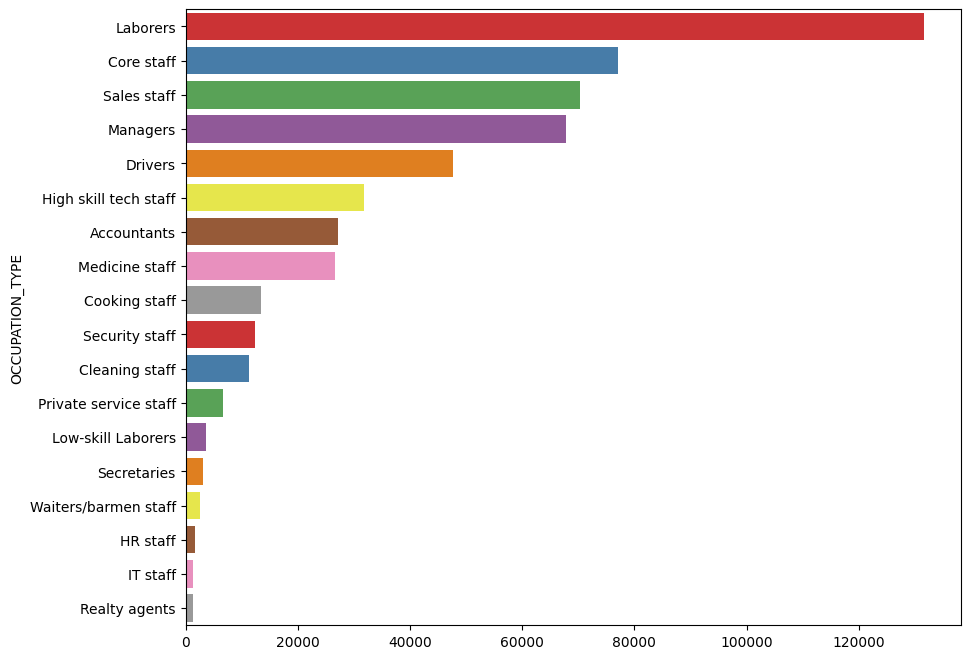

In [22]:
plt.figure(figsize=(10, 8))

sns.barplot(
            y=df["OCCUPATION_TYPE"].value_counts().index,
            x=df["OCCUPATION_TYPE"].value_counts().values,
            palette='Set1')

0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

<Axes: ylabel='STATUS'>

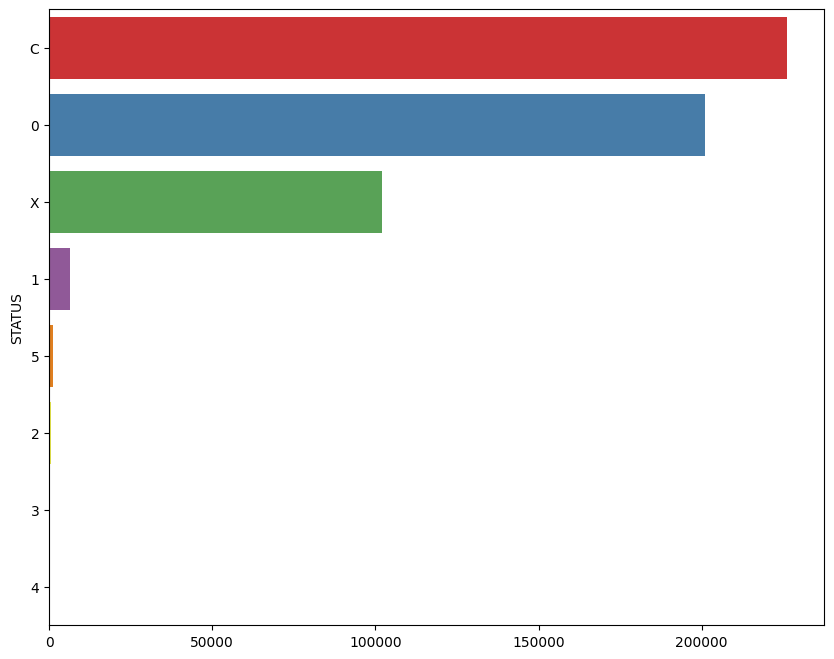

In [23]:
plt.figure(figsize=(10, 8))

sns.barplot(
            y=df["STATUS"].value_counts().index,
            x=df["STATUS"].value_counts().values,
            palette='Set1')

## Data Processing

In [24]:
df_labels = pd.read_csv("credit_approval_labels.csv")

In [25]:
print("Sample of credit approval labels:")
print(df_labels.head())

Sample of credit approval labels:
        ID  IS_APPROVED
0  5001711            1
1  5001712            1
2  5001713            1
3  5001714            1
4  5001715            1


In [26]:
print("Approval distribution:")
print(df_labels['IS_APPROVED'].value_counts())

Approval distribution:
IS_APPROVED
1    38435
0     7550
Name: count, dtype: int64


In [27]:
df1 = df_application.merge(df_labels, on='ID', how='inner')

In [28]:
df1['target'] = 1 - df1['IS_APPROVED']  # Invert the labels to match original convention

In [29]:
df1 = df1.drop('IS_APPROVED', axis=1)
df1 = df1.drop_duplicates('ID')
df1 = df1.drop('ID', axis=1)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  FLAG_MOBIL           36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

In [31]:
# Split features and target
X = df1.drop('target', axis=1)
y = df1['target']

In [32]:
# Split categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [33]:
# Create preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Machine Learning Solution

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# Build the XGBoost model with preprocessing
import xgboost as xgb
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [37]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'FLAG_MOBIL',
                                                   'FLAG_WORK_PHONE',
                                                   'FLAG_PHONE', 'FLAG_EMAIL',
                                                   'CNT_FAM_MEMBERS']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [38]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [39]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Model Evaluation:
Accuracy: 0.8313
Precision: 0.5619
Recall: 0.0869
F1 Score: 0.1506
ROC AUC: 0.6535


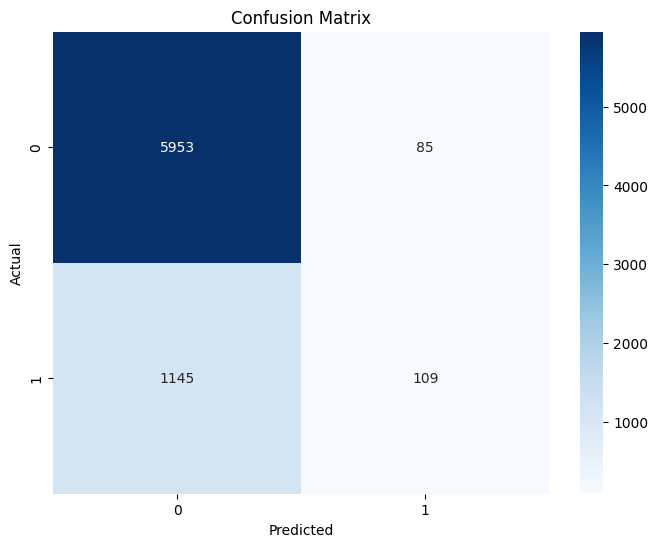

In [40]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

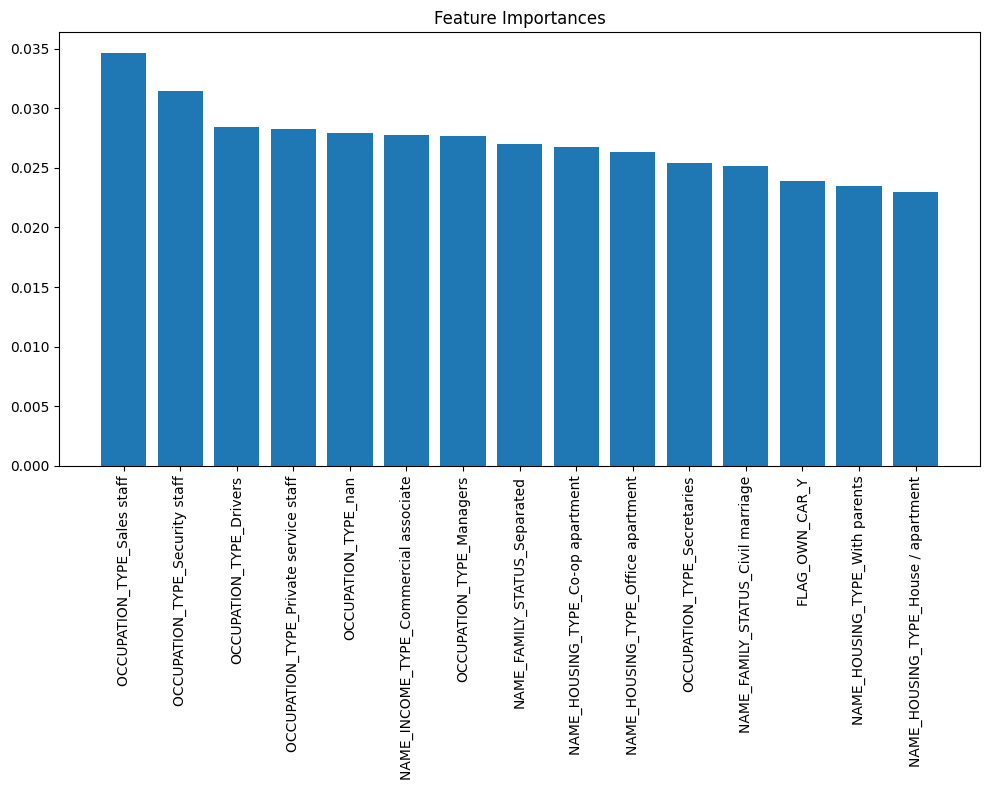

In [41]:
# Feature importance
if hasattr(model[-1], 'feature_importances_'):
    # Get feature names after preprocessing
    feature_names = numerical_features.copy()
    # Add one-hot encoded feature names
    for cat_feature in categorical_features:
        unique_values = X[cat_feature].unique()
        for value in unique_values:
            feature_names.append(f"{cat_feature}_{value}")

    # Get feature importances
    importances = model[-1].feature_importances_

    # Sort features by importance
    indices = np.argsort(importances)[::-1]

    # Plot feature importances (top 15)
    top_n = 15
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances')
    plt.bar(range(top_n), importances[indices][:top_n], align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in indices][:top_n], rotation=90)
    plt.tight_layout()
    plt.show()

### Optimaization

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 0.9}


In [43]:
# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]


In [44]:
print("\nTuned Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")


Tuned Model Evaluation:
Accuracy: 0.8287
Precision: 0.5050
Recall: 0.2010
F1 Score: 0.2875
ROC AUC: 0.6812


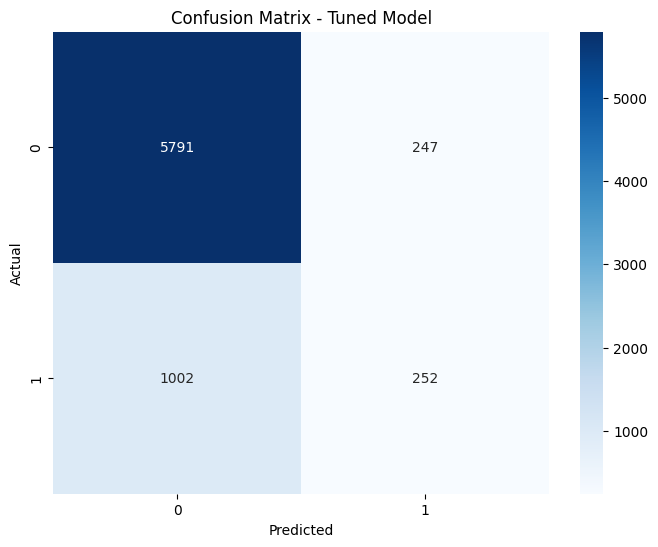

In [45]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Model')
plt.show()

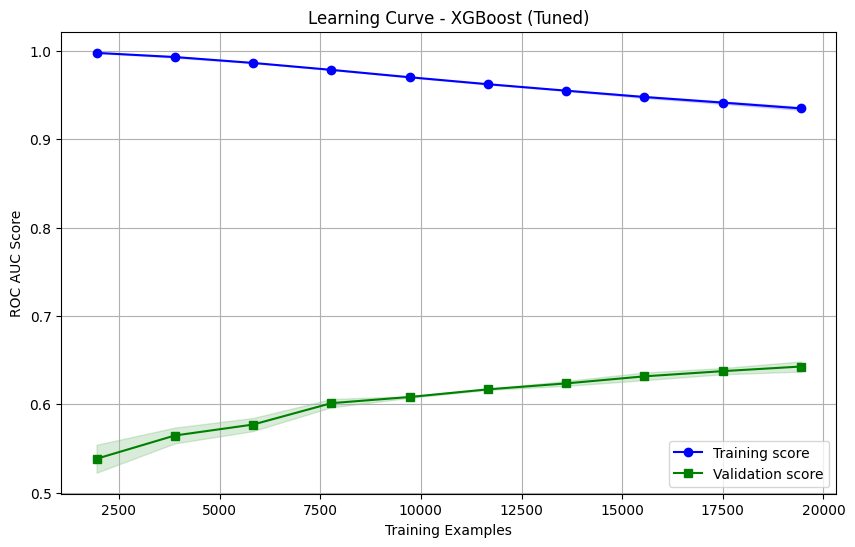

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=3, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', label='Validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve - XGBoost (Tuned)')
plt.xlabel('Training Examples')
plt.ylabel('ROC AUC Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Deep Learning

In [47]:
X_preprocessed = preprocessor.fit_transform(X)

In [48]:
# For neural networks, we need to keep track of feature dimensions after preprocessing
n_numerical_features = len(numerical_features)
n_categorical_features = sum([len(X[col].unique()) for col in categorical_features])
input_dim = X_preprocessed.shape[1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# Apply SMOTE for class imbalance (only on training data)
from imblearn.over_sampling import SMOTE
print("Applying SMOTE for class balancing...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Applying SMOTE for class balancing...


In [51]:
print(f"Training data shape before SMOTE: {X_train.shape}, after: {X_train_resampled.shape}")
print(f"Class distribution after SMOTE: {np.bincount(y_train_resampled)}")

Training data shape before SMOTE: (29165, 54), after: (48296, 54)
Class distribution after SMOTE: [24148 24148]


In [52]:
X_train_resampled = np.asarray(X_train_resampled).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [53]:
# Calculate class weights for imbalanced learning
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {
    0: total_samples / (2 * class_counts[0]),
    1: total_samples / (2 * class_counts[1])
}

print("Class weights:", class_weights)

Class weights: {0: np.float64(0.6038802385290707), 1: np.float64(2.9066175004983057)}


In [54]:
import tensorflow as tf
import keras
from keras import layers
from keras import regularizers
def build_improved_model(
    input_dim,
    hidden_units=[128, 64, 32],
    learning_rate=0.001,
    dropout_rate=0.3,
    l2_reg=0.001,
    activation='relu'
):
    # Choose activation function
    act_fn = activation

    # Use Functional API for more flexibility
    inputs = layers.Input(shape=(input_dim,))

    # First hidden layer with L2 regularization
    x = layers.Dense(
        hidden_units[0],
        activation=act_fn,
        kernel_regularizer=regularizers.l2(l2_reg),
        name='hidden_1'
    )(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Additional hidden layers with residual connections where possible
    prev_layer = x
    for i, units in enumerate(hidden_units[1:], 2):
        # Regular path
        x = layers.Dense(
            units,
            activation=act_fn,
            kernel_regularizer=regularizers.l2(l2_reg),
            name=f'hidden_{i}'
        )(prev_layer)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)

        # Store for next layer
        prev_layer = x

    # Output layer
    outputs = layers.Dense(1, activation='sigmoid', name='output')(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name="credit_card_model")

    # Compile with better metrics
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.AUC(name='auc'),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.F1Score(name='f1')
        ]
    )

    return model

In [55]:

def objective(trial):
    # Define hyperparameters to optimize
    hidden_units = [
        trial.suggest_int('hidden_units_1', 64, 256, step=32),
        trial.suggest_int('hidden_units_2', 32, 128, step=16),
        trial.suggest_int('hidden_units_3', 16, 64, step=16)
    ]
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    l2_reg = trial.suggest_float('l2_reg', 1e-4, 1e-2, log=True)
    activation = trial.suggest_categorical('activation', ['relu', 'elu', 'swish'])
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # Build model with trial hyperparameters
    model = build_improved_model(
        input_dim=X_train_resampled.shape[1],
        hidden_units=hidden_units,
        learning_rate=learning_rate,
        dropout_rate=dropout_rate,
        l2_reg=l2_reg,
        activation=activation
    )

    # Early stopping callback
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_auc',
        patience=10,
        restore_best_weights=True,
        mode='max'
    )

    # Train for few epochs to evaluate hyperparameters
    history = model.fit(
        X_train_resampled, y_train_resampled,
        epochs=30,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate and return validation AUC
    val_auc = max(history.history['val_auc'])
    return val_auc

In [56]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.9 MB/s eta 0:00:00


In [57]:
import optuna
print("Starting hyperparameter optimization...")
# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Increase for better results

print("Best hyperparameters:", study.best_params)
print("Best validation AUC:", study.best_value)

[I 2025-03-23 17:52:59,315] A new study created in memory with name: no-name-c7f7a63a-d336-4d34-a0d1-a93f8b227c0e


Starting hyperparameter optimization...


[I 2025-03-23 17:53:42,807] Trial 0 finished with value: 0.0 and parameters: {'hidden_units_1': 64, 'hidden_units_2': 80, 'hidden_units_3': 64, 'learning_rate': 0.0029032937603707975, 'dropout_rate': 0.13462585806759333, 'l2_reg': 0.0006589691847973044, 'activation': 'elu', 'batch_size': 128}. Best is trial 0 with value: 0.0.
[I 2025-03-23 17:54:32,780] Trial 1 finished with value: 0.0 and parameters: {'hidden_units_1': 96, 'hidden_units_2': 64, 'hidden_units_3': 32, 'learning_rate': 0.0001853773004566228, 'dropout_rate': 0.4715533134924762, 'l2_reg': 0.002066105882749848, 'activation': 'relu', 'batch_size': 64}. Best is trial 0 with value: 0.0.
[I 2025-03-23 17:55:38,628] Trial 2 finished with value: 0.0 and parameters: {'hidden_units_1': 192, 'hidden_units_2': 64, 'hidden_units_3': 48, 'learning_rate': 0.0005673183044349846, 'dropout_rate': 0.2810701490760015, 'l2_reg': 0.0005856659580837268, 'activation': 'relu', 'batch_size': 32}. Best is trial 0 with value: 0.0.
[I 2025-03-23 17:5

Best hyperparameters: {'hidden_units_1': 64, 'hidden_units_2': 80, 'hidden_units_3': 64, 'learning_rate': 0.0029032937603707975, 'dropout_rate': 0.13462585806759333, 'l2_reg': 0.0006589691847973044, 'activation': 'elu', 'batch_size': 128}
Best validation AUC: 0.0


In [58]:
print("Training final model with optimized hyperparameters...")
best_params = study.best_params
final_model = build_improved_model(
    input_dim=X_train_resampled.shape[1],
    hidden_units=[best_params['hidden_units_1'], best_params['hidden_units_2'], best_params['hidden_units_3']],
    learning_rate=best_params['learning_rate'],
    dropout_rate=best_params['dropout_rate'],
    l2_reg=best_params['l2_reg'],
    activation=best_params['activation']
)

Training final model with optimized hyperparameters...


In [59]:
# Callbacks for final model
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=15,
    restore_best_weights=True,
    mode='max'
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

In [60]:
# Model checkpoint to save best model
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'best_credit_card_model.h5',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [61]:
history = final_model.fit(
    X_train_resampled, y_train_resampled,
    epochs=100,
    batch_size=best_params['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5789 - auc: 0.5125 - f1: 0.5440 - loss: 0.8310 - precision: 0.3886 - recall: 0.2198
Epoch 1: val_auc improved from -inf to 0.00000, saving model to best_credit_card_model.h5


302/302 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.5790 - auc: 0.5125 - f1: 0.5440 - loss: 0.8308 - precision: 0.3886 - recall: 0.2196 - val_accuracy: 0.0041 - val_auc: 0.0000e+00 - val_f1: 1.0000 - val_loss: 0.9948 - val_precision: 1.0000 - val_recall: 0.0041 - learning_rate: 0.0029
Epoch 2/100
293/302 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6176 - auc: 0.5414 - f1: 0.5456 - loss: 0.7228 - precision: 0.4355 - recall: 0.0664
Epoch 2: val_auc did not improve from 0.00000
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6176 - auc: 0.5415 - f1: 0.5456 - loss: 0.7225 - precision: 0.4352 - recall: 0.0660 - val_accuracy: 0.0022 - val_auc: 0.0000e+00 - val_f1: 1.0000 - val_loss: 0.9916 - val_precision: 1.0000 - val_recall: 0.0022 - learning_rate: 0.0029
Epoch 3/100
300/302 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - auc: 0.5640 - f1: 0.5470 - loss: 0.6856 - precision: 0.4777 - recall: 0.0418
Epoch 3: val_auc did not improve from 0.00000
302/302 ━━━━━━━━━━━━━━━━━━

In [62]:
# Evaluate final model
y_pred_proba = final_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
# Print metrics
print("Deep Learning Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Deep Learning Model Evaluation:
Accuracy: 0.8249
Precision: 0.1034
Recall: 0.0024
F1 Score: 0.0047
ROC AUC: 0.5236


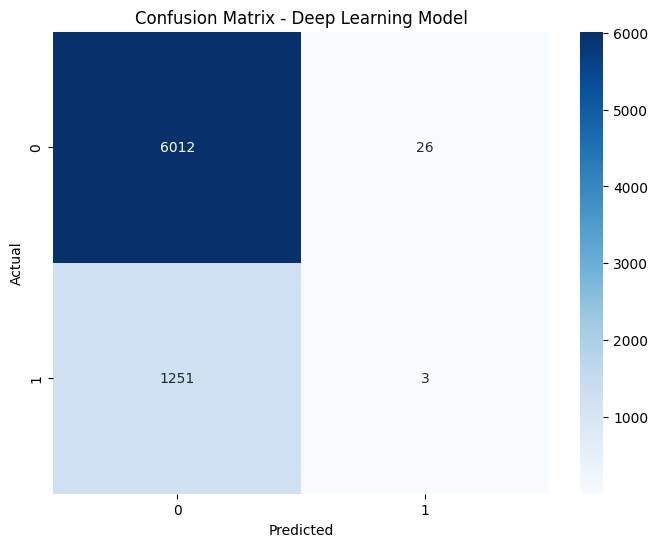

In [64]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning Model')
plt.show()


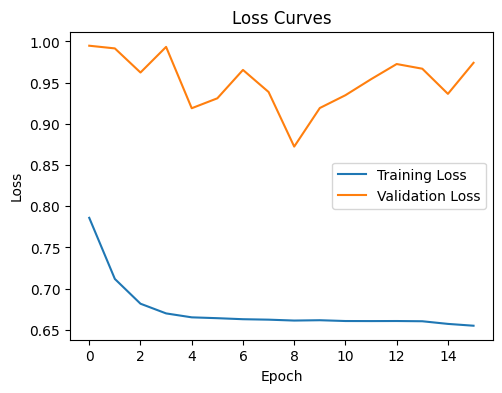

In [65]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


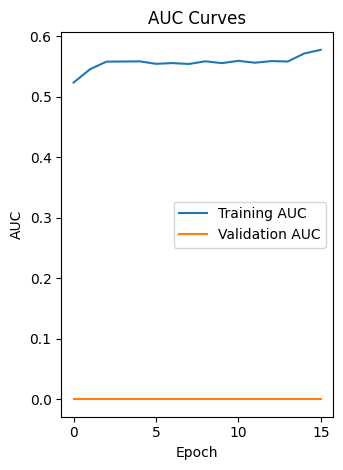

In [66]:
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC Curves')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.show()